In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from AVN import *
import pandas as pd
from scipy.stats import norm
import scipy.special as scp
import os

In [2]:
###Define colors code for plots:
from matplotlib import cm

##Get colors : 
cmap_name1 = cm.get_cmap('tab20', 20)
cmap_name2 = cm.get_cmap('tab20b', 20)
cmap_name3 = cm.get_cmap('tab20c', 20)
cmap_name4 = cm.get_cmap('tab10', 10)
cmap_name5 = cm.get_cmap('Set3', 12)

cmap1 = cmap_name1(np.linspace(0, 1, 20))
cmap2 = cmap_name2(np.linspace(0, 1, 20))
cmap3 = cmap_name3(np.linspace(0, 1, 20))
cmap4 = cmap_name4(np.linspace(0, 1, 10))
cmap5 = cmap_name5(np.linspace(0, 1, 12))

cmap = np.vstack([cmap1, cmap2, cmap3, cmap4, cmap5])

print(len(cmap))

82


/var/folders/y0/1f0_mqt97bqb9mq9bp449rwr0000gn/T/ipykernel_39046/4134225532.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_name1 = cm.get_cmap('tab20', 20)
/var/folders/y0/1f0_mqt97bqb9mq9bp449rwr0000gn/T/ipykernel_39046/4134225532.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_name2 = cm.get_cmap('tab20b', 20)
/var/folders/y0/1f0_mqt97bqb9mq9bp449rwr0000gn/T/ipykernel_39046/4134225532.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_name3 = cm.get_

In [3]:
##Add migration swarms:
#
dfM = pd.read_csv("/Users/louise/Desktop/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/dfM.csv")
#dfM = pd.read_csv("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/dfM.csv")

##And without:
#
dfNM = pd.read_csv("/Users/louise/Desktop/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/dfNM.csv")
#dfNM = pd.read_csv("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/dfNM.csv")

dfM

,N,max_m,V2,plana,I,duration,v,swarms
0,180,1.7358,0.0403,0.0669,1,3.4026,0.000133,1
1,86,1.9626,0.0152,0.3706,2,2.0668,0.097782,2
2,69,0.7173,0.0093,0.4461,4,1.9180,0.112986,4
3,90,1.5348,0.0229,0.4009,5,4.0596,0.036495,5
4,161,2.1737,0.0259,0.6164,8,3.6663,0.060144,8
5,523,2.4513,0.1044,0.6143,10,1.4172,0.045565,10
6,102,2.3205,0.0083,0.4228,11,0.5002,0.015355,11
7,251,2.0582,0.0538,0.4356,12,3.1772,0.027905,12
8,1009,2.0887,0.9274,0.1601,13,2.5538,0.024208,13
9,202,2.2569,0.0493,0.4398,14,4.9087,0.017085,14


In [4]:
#
path_to_df0 = "/Users/louise/Desktop/new_all_run_files_for_etas/catalog_all/"
#path_to_df0 = "/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/catalog_all/"

####Raw data:
df0 = pd.read_csv(path_to_df0+'raw_data_modified_version.csv')
###Structure : t, x, y, z, m, x_km, y_km

###Swarms obtained by after ETAS & seismicity rate & checking step:
df_swarms = pd.read_csv('v0_d03_n50_every1_clusters/new_df_final_swarms_of_v0_d03_n50_every1.csv')

##Rename swarms after sorting along t1:
df_swarms = df_swarms.sort_values("t1")
df_swarms.index = np.arange(1, len(df_swarms)+1)


###Create a column of swarms number:
df0["swarms_num"] = np.zeros(len(df0)) -1


for i in range(0, len(df_swarms)):
    select_swarms = df0.index[(df0.t >= df_swarms.t1.iloc[i])&(df0.t <= df_swarms.t2.iloc[i])
                       & (df0.x >= df_swarms.x1.iloc[i])&(df0.x <= df_swarms.x2.iloc[i])
                       & (df0.y >= df_swarms.y1.iloc[i])&(df0.y <= df_swarms.y2.iloc[i])
                       & (df0.z >= df_swarms.z1.iloc[i])&(df0.z <= df_swarms.z2.iloc[i])]
    
    df0.swarms_num.iloc[select_swarms] = df_swarms.index[i]   
    
    
df0['swarms_num'] = df0['swarms_num'].astype(int)

print(np.unique(df0["swarms_num"].values)[1:])

###Remove all rows with a magnitude equal to a nan value:
df0 = df0.dropna()

df0.index = np.arange(0, len(df0))

###Define AVN MS:
A, V, N, df_AVN = AVN(df0)

###Rescale on Norcia event:
xN_km = df0.x_km - N.x_km ##lat
yN_km = df0.y_km - N.y_km ##lon

df0["xN_km"] = xN_km
df0["yN_km"] = yN_km

###Redefine AVN MS:
A, V, N, df_AVN = AVN(df0)

df0_m5 = df0[df0.m >= 5]

df0

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


,t,x,y,z,m,x_km,y_km,swarms_num,xN_km,yN_km
0,0.004465,42.99118,12.92042,4.107,0.547416,4780.401106,1050.875824,-1,17.251893,-19.029404
1,0.024991,42.30519,13.68531,6.154,0.964305,4704.122499,1125.431260,-1,-59.026715,55.526032
2,0.028414,43.52994,12.65680,14.826,0.025395,4840.308485,1020.365169,-1,77.159272,-49.540059
3,0.030136,43.16713,12.99694,8.917,-0.127835,4799.965854,1054.068313,-1,36.816640,-15.836915
4,0.043938,43.31555,12.55297,3.274,-0.889339,4816.469405,1015.584715,-1,53.320191,-54.320513
...,...,...,...,...,...,...,...,...,...,...
894438,365.996726,42.81393,13.10829,7.216,-0.325824,4760.691806,1069.225754,-1,-2.457408,-0.679474
894439,365.997166,42.80558,13.14988,3.126,0.304970,4759.763328,1072.763006,-1,-3.385886,2.857778
894440,365.997419,43.00835,13.14668,1.336,-0.183670,4782.310323,1068.979802,-1,19.161110,-0.925426
894441,365.999614,42.66073,13.21744,4.262,-0.273458,4743.656743,1080.795874,-1,-19.492471,10.890646


In [5]:
from obspy.imaging.beachball import beach

##get moment tensor informations : https://www.globalcmt.org/CMTsearch.html 

mtA = [-2.400, 0.533, 1.860, 0.016, -0.660, -0.985]
mtV = [-2.190, 0.302, 1.880, 0.188, -1.030, -0.652]
mtN = [-1.470, 0.233, 1.230, 0.196, -0.543, -0.627]

In [6]:
from matplotlib.patches import Rectangle

with open('v0_d03_n50_every1_clusters/mean_all_A_primx_and_mean_all_A_primy.npy', 'rb') as f:
    mean_all_A_primx = np.load(f)
    mean_all_A_primy = np.load(f)

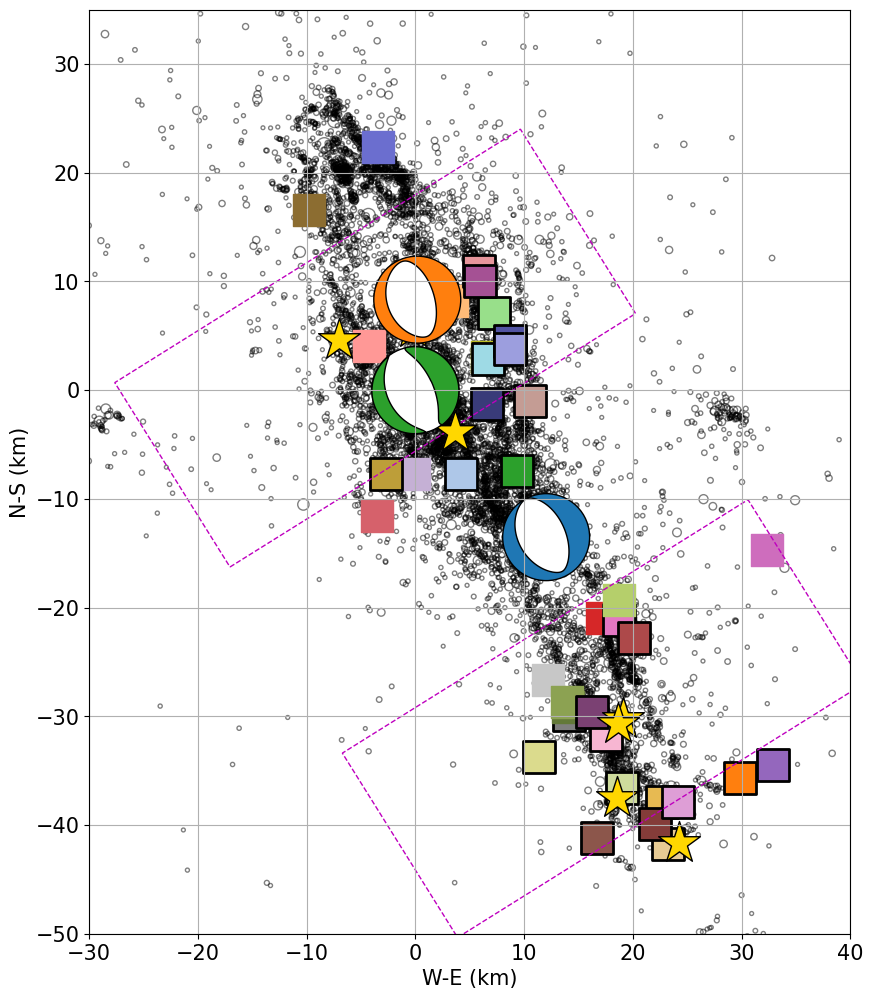

In [7]:
#%matplotlib widget
m_min = 2
msz = 500
msz_stars = 1000
msz_beach = 8

###############IN KM
plt.figure(figsize=(12,12))
##All EQ:
plt.scatter(df0.yN_km[df0.m >= m_min], df0.xN_km[df0.m >= m_min], s=np.exp(df0.m[df0.m >= m_min]), facecolors='none', edgecolors='k', linewidths=1, alpha=0.5)

##swarms clusters:
list_swarms = np.unique(df0.swarms_num)[1:]
for i in list_swarms:
    if dfM[dfM.I.values == i].empty == False:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.yN_km.mean(), I.xN_km.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors='k', linewidths=2)
    
    else:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.yN_km.mean(), I.xN_km.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors=cmap[int(i)], linewidths=1)
        
for k in range(0, len(mean_all_A_primx)):
    if k == 1:
        #add rectangle
        plt.gca().add_patch(Rectangle((mean_all_A_primx[k], mean_all_A_primy[k]),44,20,
                            angle=32,
                            edgecolor='m',
                            facecolor='none',
                            ls='--',
                            lw=1))
        
    elif k == 3:
        #add rectangle
        plt.gca().add_patch(Rectangle((mean_all_A_primx[k], mean_all_A_primy[k]),44,20,
                            angle=32,
                            edgecolor='m',
                            facecolor='none',
                            ls='--',
                            lw=1))
    ##44,10, or 44,20,

plt.scatter(df0_m5.yN_km, df0_m5.xN_km, s=msz_stars, marker='*', c='gold', edgecolors='k', linewidths=1)
plt.scatter(A.yN_km, A.xN_km, s=msz_stars, marker='*', c='tab:blue', edgecolors='tab:red', linewidths=1)
plt.scatter(V.yN_km, V.xN_km, s=msz_stars, marker='*', c='tab:orange', edgecolors='tab:red', linewidths=1)
plt.scatter(N.yN_km, N.xN_km, s=msz_stars, marker='*', c='tab:green', edgecolors='tab:red', linewidths=1)
ax=plt.gca()
bcA = beach(mtA, xy=(A.yN_km, A.xN_km), width=msz_beach, linewidth=1, facecolor='tab:blue')
bcA.set_zorder(1)
ax.add_collection(bcA)
bcV = beach(mtV, xy=(V.yN_km, V.xN_km), width=msz_beach, linewidth=1, facecolor='tab:orange')
bcV.set_zorder(1)
ax.add_collection(bcV)
bcN = beach(mtN, xy=(N.yN_km, N.xN_km), width=msz_beach, linewidth=1, facecolor='tab:green')
bcN.set_zorder(1)
ax.add_collection(bcN)
plt.xlabel("W-E (km)", fontsize=15)
plt.ylabel("N-S (km)", fontsize=15)
plt.tick_params(axis="both", labelsize=15)
plt.gca().set_aspect('equal', 'box')
plt.xlim(-30, 40)
plt.ylim(-50,35)
plt.grid(True)

plt.show()

In [8]:
%%time 

#y = np.arange(np.ceil(df0.yN_km.min()), np.ceil(df0.yN_km.max()),2)
#
x = np.arange(40,-50-2,-2)
print(x, len(x))

#x = np.arange(np.ceil(df0.xN_km.min()), np.ceil(df0.xN_km.max()),2)
y = np.arange(-60, 50+2, 2)
print(y, len(y))

##2kmx2km

matrix = np.zeros((len(x), len(y)))
print(np.shape(matrix))

for i in range(0, len(x)-1):
    select_data = df0[(df0.xN_km >= np.min([x[i], x[i+1]]))&(df0.xN_km <np.max([x[i], x[i+1]]))]

    for j  in range(0, len(y)-1):
        select_data = df0[(df0.xN_km >= np.min([x[i], x[i+1]]))&(df0.xN_km <np.max([x[i], x[i+1]]))
                     & (df0.yN_km >= np.min([y[j], y[j+1]]))&(df0.yN_km <np.max([y[j], y[j+1]]))]

        L = len(select_data)
        
        if L < 1:
            L = np.nan

        matrix[i,j] = L
        
matrix

[ 40  38  36  34  32  30  28  26  24  22  20  18  16  14  12  10   8   6
   4   2   0  -2  -4  -6  -8 -10 -12 -14 -16 -18 -20 -22 -24 -26 -28 -30
 -32 -34 -36 -38 -40 -42 -44 -46 -48 -50] 46
[-60 -58 -56 -54 -52 -50 -48 -46 -44 -42 -40 -38 -36 -34 -32 -30 -28 -26
 -24 -22 -20 -18 -16 -14 -12 -10  -8  -6  -4  -2   0   2   4   6   8  10
  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46
  48  50] 56
(46, 56)
CPU times: user 11.4 s, sys: 314 ms, total: 11.7 s
Wall time: 12.2 s


array([[nan,  1.,  7., ..., nan, nan,  0.],
       [nan,  1.,  2., ..., nan, nan,  0.],
       [nan, nan,  1., ..., nan, nan,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan,  0.],
       [nan, nan, nan, ..., nan, nan,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [9]:
###Get max value:
matrix2 = matrix
matrix2=matrix2[~np.isnan(matrix2)]
np.max(matrix2)

16853.0

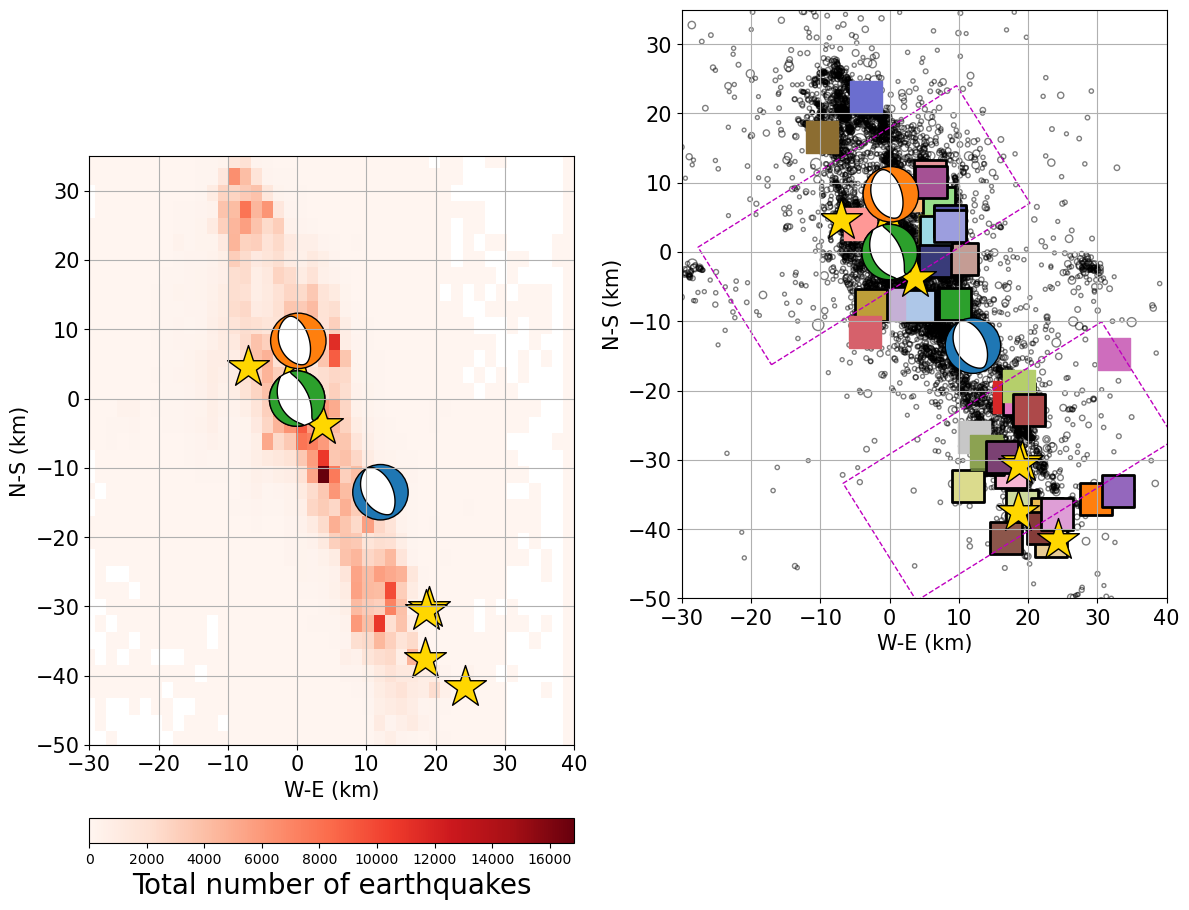

In [10]:
plt.figure(figsize=(12,15))
plt.subplot(1,2,1)
im = plt.imshow(matrix, cmap = 'Reds', extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
plt.clim(0, np.max(matrix2))
cb = plt.colorbar(im,orientation='horizontal',  pad=0.05).set_label(label='Total number of earthquakes', size=20)

plt.scatter(df0_m5.yN_km, df0_m5.xN_km, s=msz_stars, marker='*', c='gold', edgecolors='k', linewidths=1)
plt.scatter(A.yN_km, A.xN_km, s=msz_stars, marker='*', c='tab:blue', edgecolors='tab:red', linewidths=1)
plt.scatter(V.yN_km, V.xN_km, s=msz_stars, marker='*', c='tab:orange', edgecolors='tab:red', linewidths=1)
plt.scatter(N.yN_km, N.xN_km, s=msz_stars, marker='*', c='tab:green', edgecolors='tab:red', linewidths=1)
ax=plt.gca()
bcA = beach(mtA, xy=(A.yN_km, A.xN_km), width=msz_beach, linewidth=1, facecolor='tab:blue')
bcA.set_zorder(1)
ax.add_collection(bcA)
bcV = beach(mtV, xy=(V.yN_km, V.xN_km), width=msz_beach, linewidth=1, facecolor='tab:orange')
bcV.set_zorder(1)
ax.add_collection(bcV)
bcN = beach(mtN, xy=(N.yN_km, N.xN_km), width=msz_beach, linewidth=1, facecolor='tab:green')
bcN.set_zorder(1)
ax.add_collection(bcN)

plt.xlabel("W-E (km)", fontsize=15)
plt.ylabel("N-S (km)", fontsize=15)
plt.tick_params(axis="both", labelsize=15)
plt.gca().set_aspect('equal', 'box')
plt.xlim(-30, 40)
plt.ylim(-50,35)
plt.grid()

plt.subplot(1,2,2)
plt.scatter(df0.yN_km[df0.m >= m_min], df0.xN_km[df0.m >= m_min], s=np.exp(df0.m[df0.m >= m_min]), facecolors='none', edgecolors='k', linewidths=1, alpha=0.5)

##swarms clusters:
list_swarms = np.unique(df0.swarms_num)[1:]
for i in list_swarms:
    if dfM[dfM.I.values == i].empty == False:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.yN_km.mean(), I.xN_km.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors='k', linewidths=2)
    
    else:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.yN_km.mean(), I.xN_km.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors=cmap[int(i)], linewidths=1)
    
for k in range(0, len(mean_all_A_primx)):
    if k == 1:
        #add rectangle
        plt.gca().add_patch(Rectangle((mean_all_A_primx[k], mean_all_A_primy[k]),44,20,
                            angle=32,
                            edgecolor='m',
                            facecolor='none',
                            ls='--',
                            lw=1))
        
    elif k == 3:
        #add rectangle
        plt.gca().add_patch(Rectangle((mean_all_A_primx[k], mean_all_A_primy[k]),44,20,
                            angle=32,
                            edgecolor='m',
                            facecolor='none',
                            ls='--',
                            lw=1))
    ##44,10, or 44,20,
    
plt.scatter(df0_m5.yN_km, df0_m5.xN_km, s=msz_stars, marker='*', c='gold', edgecolors='k', linewidths=1)
plt.scatter(A.yN_km, A.xN_km, s=msz_stars, marker='*', c='tab:blue', edgecolors='tab:red', linewidths=1)
plt.scatter(V.yN_km, V.xN_km, s=msz_stars, marker='*', c='tab:orange', edgecolors='tab:red', linewidths=1)
plt.scatter(N.yN_km, N.xN_km, s=msz_stars, marker='*', c='tab:green', edgecolors='tab:red', linewidths=1)
ax=plt.gca()
bcA = beach(mtA, xy=(A.yN_km, A.xN_km), width=msz_beach, linewidth=1, facecolor='tab:blue')
bcA.set_zorder(1)
ax.add_collection(bcA)
bcV = beach(mtV, xy=(V.yN_km, V.xN_km), width=msz_beach, linewidth=1, facecolor='tab:orange')
bcV.set_zorder(1)
ax.add_collection(bcV)
bcN = beach(mtN, xy=(N.yN_km, N.xN_km), width=msz_beach, linewidth=1, facecolor='tab:green')
bcN.set_zorder(1)
ax.add_collection(bcN)
plt.xlabel("W-E (km)", fontsize=15)
plt.ylabel("N-S (km)", fontsize=15)
plt.tick_params(axis="both", labelsize=15)
plt.gca().set_aspect('equal', 'box')
plt.xlim(-30, 40)
plt.ylim(-50,35)
plt.grid(True)

plt.tight_layout()
plt.savefig("double_maps.png")
plt.show()